In [32]:
import numpy as np
import matplotlib.pyplot as plt
import json

with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240NewestData/scenario_1/run1/combine_SecondNoMllBelow30ForElec_noInterp/all_limits.json", "r") as f:
    all_limits = json.load(f)

In [33]:
def fillMissingLimits(limits):
    for val in ['0.03', '0.16', '0.5', '0.84', '0.97']:
        if val not in limits:
            limits[val] = 0
    
    return limits

In [204]:
from scipy.interpolate import griddata

def getGrid(all_limits, all_ms, lim_val, method = 'cubic'):
    # Sort them in the correct order
    ind = np.lexsort((all_ms[:,1],all_ms[:,0]))    
    all_ms = all_ms[ind]
    
    limits = []
    mHs = []
    diffs = []
    for mH, mA in all_ms:
        # if mA - mH <= 2:
        #     continue
        mHs.append(mH)
        diffs.append(mA - mH)
        print(mH, mA)

        if mA - mH <= 30:
            try: 
                lim = all_limits[f"mH{mH}_mA{mA}"]['MuMu'][lim_val]
            except:
                lim = 2
        else:
            try:
                lim = all_limits[f"mH{mH}_mA{mA}"]['combined'][lim_val]
            except:
                try:
                    lim = all_limits[f"mH{mH}_mA{mA}"]['MuMu'][lim_val]
                except:
                    lim = 2

        limits.append(lim)

    # Now get the grid
    limits = np.array(limits)
    mHs = np.array(mHs)
    diffs = np.array(diffs)

    # Now combine these so they are shape (n, 2)
    masses = np.vstack((mHs, diffs)).T
    limits[limits > 1.5] = 1.5

    grid_x, grid_y = np.meshgrid(np.arange(np.min(mHs), np.max(mHs) + 6, 1),
                                np.arange(0, np.max(diffs) + 1, 1), indexing='ij')



    grid = griddata(masses, limits, (grid_x, grid_y), method=method)

    # Make nan be 2
    grid[grid > 1.5] = 1.5
    grid[np.isnan(grid)] = 1.5

    return grid, grid_x, grid_y

    

In [34]:
# First I need to make the grid
all_ms = np.loadtxt("/vols/cms/emc21/FCC/FCC-Study/runs/e240NewestData/scenario_1/run1/combine_SecondNoMllBelow30ForElec_noInterp/mass_scan.txt")

# Sort them in the correct order
ind = np.lexsort((all_ms[:,1],all_ms[:,0]))    
all_ms = all_ms[ind]


In [136]:
limits = []
mHs = []
diffs = []
for mH, mA in all_ms:
    # if mA - mH <= 2:
    #     continue
    mHs.append(mH)
    diffs.append(mA - mH)
    print(mH, mA)

    if mA - mH <= 30:
        try: 
            lim = all_limits[f"mH{mH}_mA{mA}"]['MuMu']['0.5']
        except:
            lim = 2
    else:
        try:
            lim = all_limits[f"mH{mH}_mA{mA}"]['combined']['0.5']
        except:
            try:
                lim = all_limits[f"mH{mH}_mA{mA}"]['MuMu']['0.5']
            except:
                lim = 2

    limits.append(lim)


70.0 72.0
70.0 74.0
70.0 76.0
70.0 78.0
70.0 80.0
70.0 85.0
70.0 90.0
70.0 95.0
70.0 100.0
70.0 105.0
70.0 110.0
70.0 115.0
70.0 120.0
70.0 125.0
70.0 130.0
70.0 135.0
70.0 140.0
70.0 145.0
70.0 150.0
70.0 152.0
70.0 154.0
70.0 156.0
70.0 158.0
70.0 160.0
70.0 162.0
70.0 164.0
70.0 166.0
70.0 168.0
70.0 170.0
75.0 77.0
75.0 79.0
75.0 81.0
75.0 83.0
75.0 85.0
75.0 90.0
75.0 95.0
75.0 100.0
75.0 105.0
75.0 110.0
75.0 115.0
75.0 120.0
75.0 125.0
75.0 130.0
75.0 135.0
75.0 140.0
75.0 145.0
75.0 147.0
75.0 149.0
75.0 151.0
75.0 153.0
75.0 155.0
75.0 157.0
75.0 159.0
75.0 161.0
75.0 163.0
75.0 165.0
80.0 82.0
80.0 84.0
80.0 86.0
80.0 88.0
80.0 90.0
80.0 95.0
80.0 100.0
80.0 105.0
80.0 110.0
80.0 115.0
80.0 120.0
80.0 125.0
80.0 130.0
80.0 135.0
80.0 140.0
80.0 142.0
80.0 144.0
80.0 146.0
80.0 148.0
80.0 150.0
80.0 152.0
80.0 154.0
80.0 156.0
80.0 158.0
80.0 160.0
85.0 87.0
85.0 89.0
85.0 91.0
85.0 93.0
85.0 95.0
85.0 100.0
85.0 105.0
85.0 110.0
85.0 115.0
85.0 120.0
85.0 125.0
85.0 130.0
85.

In [137]:
print(mHs[:10])
print(diffs[:10])

limits = np.array(limits)
mHs = np.array(mHs)
diffs = np.array(diffs)

# Now combine these so they are shape (n, 2)
masses = np.vstack((mHs, diffs)).T
print(masses[:10])

limits[limits > 2] = 2

[70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0]
[2.0, 4.0, 6.0, 8.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0]
[[70.  2.]
 [70.  4.]
 [70.  6.]
 [70.  8.]
 [70. 10.]
 [70. 15.]
 [70. 20.]
 [70. 25.]
 [70. 30.]
 [70. 35.]]


In [138]:
grid_x, grid_y = np.meshgrid(np.arange(np.min(mHs), np.max(mHs) + 6, 1),
                             np.arange(0, np.max(diffs) + 1, 1), indexing='ij')


from scipy.interpolate import griddata

grid_z0 = griddata(masses, limits, (grid_x, grid_y), method='cubic')

In [139]:
grid_x.T

array([[ 70.,  71.,  72., ..., 113., 114., 115.],
       [ 70.,  71.,  72., ..., 113., 114., 115.],
       [ 70.,  71.,  72., ..., 113., 114., 115.],
       ...,
       [ 70.,  71.,  72., ..., 113., 114., 115.],
       [ 70.,  71.,  72., ..., 113., 114., 115.],
       [ 70.,  71.,  72., ..., 113., 114., 115.]])

In [140]:
grid_y.T

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       ...,
       [ 98.,  98.,  98., ...,  98.,  98.,  98.],
       [ 99.,  99.,  99., ...,  99.,  99.,  99.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [141]:
grid_z0.T

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [2.        , 2.0918398 , 2.11172653, ...,        nan,        nan,
               nan],
       ...,
       [2.        , 1.91638946,        nan, ...,        nan,        nan,
               nan],
       [2.09479222,        nan,        nan, ...,        nan,        nan,
               nan],
       [2.        ,        nan,        nan, ...,        nan,        nan,
               nan]])

In [121]:
masses[:10]

array([[70.,  2.],
       [70.,  4.],
       [70.,  6.],
       [70.,  8.],
       [70., 10.],
       [70., 15.],
       [70., 20.],
       [70., 25.],
       [70., 30.],
       [70., 35.]])

In [122]:
# Make nan be 2
grid_z0[np.isnan(grid_z0)] = 2

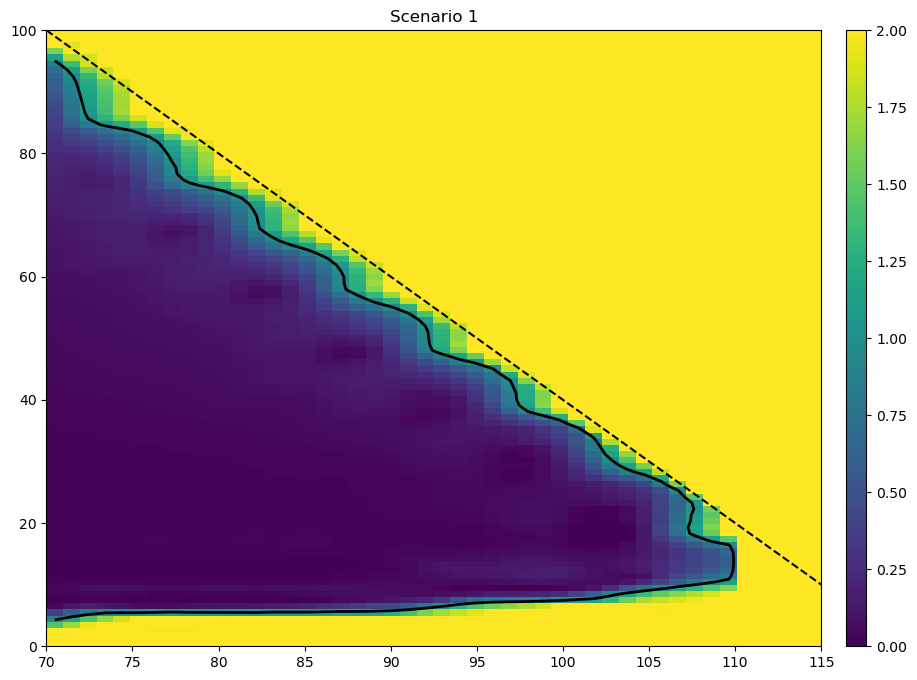

In [125]:
import matplotlib.pyplot as plt
cmap = plt.cm.viridis
cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(grid_z0.T, extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), 
          origin='lower', cmap = cmap, aspect='auto')

con = plt.contour(grid_z0.T, np.array([1]) , colors=['black'], linewidths=[2], 
                  extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), origin='lower')
handles_con, labels = con.legend_elements()

line = plt.plot([70, 120], [100, 0], color='black', linestyle='--', label = f'$M_H$ + $M_A$ = {ecom} GeV')



# plt.scatter(masses[:, 0], masses[:, 1], s=10, color='red') 

plt.xlim(70, 115)
im.set_clim(0, 2)
ax.set_title('Scenario 1')
#plt.colorbar()

cax = fig.add_axes([ax.get_position().x1+0.025,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)



In [312]:
g, gx, gy = getGrid(all_limits, all_ms, '0.5')

70.0 72.0
70.0 74.0
70.0 76.0
70.0 78.0
70.0 80.0
70.0 85.0
70.0 90.0
70.0 95.0
70.0 100.0
70.0 105.0
70.0 110.0
70.0 115.0
70.0 120.0
70.0 125.0
70.0 130.0
70.0 135.0
70.0 140.0
70.0 145.0
70.0 150.0
70.0 152.0
70.0 154.0
70.0 156.0
70.0 158.0
70.0 160.0
70.0 162.0
70.0 164.0
70.0 166.0
70.0 168.0
70.0 170.0
75.0 77.0
75.0 79.0
75.0 81.0
75.0 83.0
75.0 85.0
75.0 90.0
75.0 95.0
75.0 100.0
75.0 105.0
75.0 110.0
75.0 115.0
75.0 120.0
75.0 125.0
75.0 130.0
75.0 135.0
75.0 140.0
75.0 145.0
75.0 147.0
75.0 149.0
75.0 151.0
75.0 153.0
75.0 155.0
75.0 157.0
75.0 159.0
75.0 161.0
75.0 163.0
75.0 165.0
80.0 82.0
80.0 84.0
80.0 86.0
80.0 88.0
80.0 90.0
80.0 95.0
80.0 100.0
80.0 105.0
80.0 110.0
80.0 115.0
80.0 120.0
80.0 125.0
80.0 130.0
80.0 135.0
80.0 140.0
80.0 142.0
80.0 144.0
80.0 146.0
80.0 148.0
80.0 150.0
80.0 152.0
80.0 154.0
80.0 156.0
80.0 158.0
80.0 160.0
85.0 87.0
85.0 89.0
85.0 91.0
85.0 93.0
85.0 95.0
85.0 100.0
85.0 105.0
85.0 110.0
85.0 115.0
85.0 120.0
85.0 125.0
85.0 130.0
85.

In [317]:
np.min(gy)

0.0

In [205]:
grid_central = getGrid(all_limits, all_ms, '0.5')[0]
grid_upper = getGrid(all_limits, all_ms, '0.84')[0]
grid_lower = getGrid(all_limits, all_ms, '0.16')[0]

70.0 72.0
70.0 74.0
70.0 76.0
70.0 78.0
70.0 80.0
70.0 85.0
70.0 90.0
70.0 95.0
70.0 100.0
70.0 105.0
70.0 110.0
70.0 115.0
70.0 120.0
70.0 125.0
70.0 130.0
70.0 135.0
70.0 140.0
70.0 145.0
70.0 150.0
70.0 152.0
70.0 154.0
70.0 156.0
70.0 158.0
70.0 160.0
70.0 162.0
70.0 164.0
70.0 166.0
70.0 168.0
70.0 170.0
75.0 77.0
75.0 79.0
75.0 81.0
75.0 83.0
75.0 85.0
75.0 90.0
75.0 95.0
75.0 100.0
75.0 105.0
75.0 110.0
75.0 115.0
75.0 120.0
75.0 125.0
75.0 130.0
75.0 135.0
75.0 140.0
75.0 145.0
75.0 147.0
75.0 149.0
75.0 151.0
75.0 153.0
75.0 155.0
75.0 157.0
75.0 159.0
75.0 161.0
75.0 163.0
75.0 165.0
80.0 82.0
80.0 84.0
80.0 86.0
80.0 88.0
80.0 90.0
80.0 95.0
80.0 100.0
80.0 105.0
80.0 110.0
80.0 115.0
80.0 120.0
80.0 125.0
80.0 130.0
80.0 135.0
80.0 140.0
80.0 142.0
80.0 144.0
80.0 146.0
80.0 148.0
80.0 150.0
80.0 152.0
80.0 154.0
80.0 156.0
80.0 158.0
80.0 160.0
85.0 87.0
85.0 89.0
85.0 91.0
85.0 93.0
85.0 95.0
85.0 100.0
85.0 105.0
85.0 110.0
85.0 115.0
85.0 120.0
85.0 125.0
85.0 130.0
85.

Text(0.6, 0.55, 'Scenario 1:\n$M_{H^\\pm} = M_A$\n$\\lambda_{345} = 1e\\textit{-}6$')

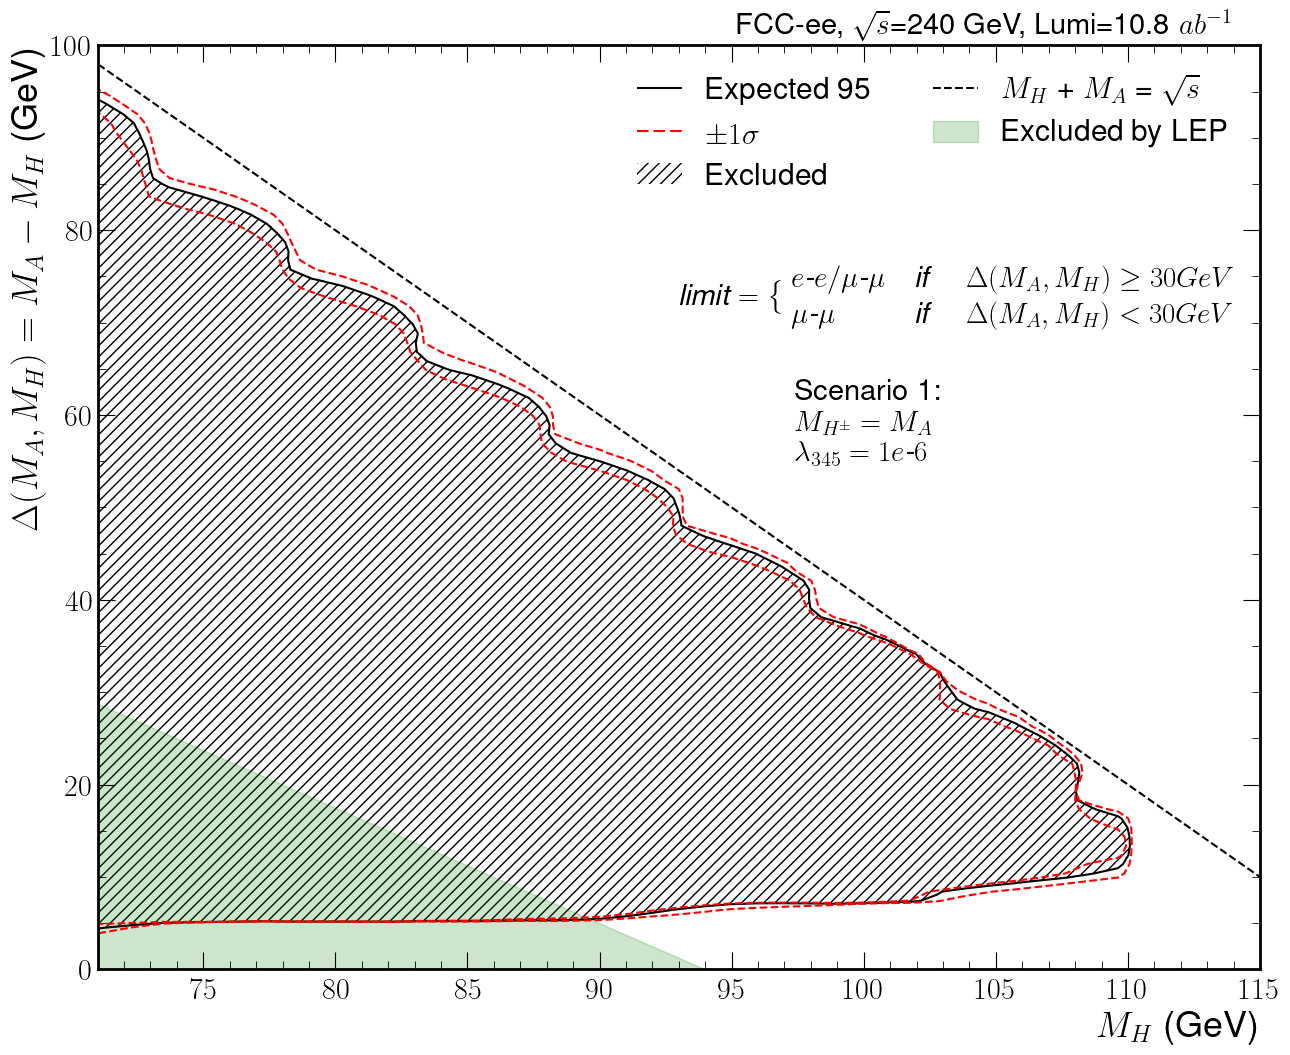

In [275]:
import matplotlib.pyplot as plt
import mplhep as hep 

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

ecom = 240

cmap = plt.cm.viridis
cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(15,12))
masked_array = np.ma.masked_where(np.ones_like(grid_central.T) * -1 == -1, grid_central.T)
im = ax.imshow(masked_array, extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), 
          origin='lower', cmap = cmap, aspect='auto')




con_filled = ax.contourf(grid_central.T, np.array([0, 1]), colors=['white', 'white'],
                   hatches = ['///', '//////'], levels=[-10, 1], alpha=1, origin='lower',
                    extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)))
handles_con_filled, labels_filled = con_filled.legend_elements()




con = ax.contour(grid_central.T, np.array([1]) , colors=['black'], linewidths=[1.5], 
                  extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), origin='lower')
handles_con, labels = con.legend_elements()

con_up = ax.contour(grid_upper.T, np.array([1]) , colors=['red'], linewidths=[1.5],
                    extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), 
                    origin='lower', linestyles='dashed')
handles_con_up, labels_con_up = con_up.legend_elements()
con_down = ax.contour(grid_lower.T, np.array([1]) , colors=['red'], linewidths=[1.5],
                    extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), 
                    origin='lower', linestyles='dashed')
handles_con_down, labels_con_down = con_down.legend_elements()


line = ax.plot([70, 120], [100, 0], color='black', linestyle='--', label = f'$M_H$ + $M_A$ = {ecom} GeV')



# x = np.arange(50, 71, 1)
# y1 = (-5 / 4) * x + 117.5
# y2 = 400 * np.ones_like(x)
# excl_dm = plt.fill_between(x, y1, y2, color='blue', alpha=0.2, label = 'Excluded by DM Observations')
# #handles_excl_dm, labels_excl_dm = excl_dm.legend_elements()

x2 = np.arange(50, 95, 1)
y3 = (-5 / 4) * x2 + 117.5
y4 = 0 * np.ones_like(x2)
excl_LEP = plt.fill_between(x2, y3, y4, color='green', alpha=0.2, label = 'Excluded by LEP')

# legend_elements += [excl_dm, excl_LEP]
# legend_names += ["Relic Density", "LEP SUSY Recast"]



ax.legend(handles_con + handles_con_up + handles_con_filled  + line + [excl_LEP],
          ["Expected 95% CL", "$\pm 1 \sigma$", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$', "Excluded by LEP"], 
          loc='upper right',ncol=2)


plt.ylim(0, 100)
plt.xlim(71, 115)


plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$=240 GeV,  Lumi=10.8 $ab^{-1}$", fontsize="21",
             transform=ax.transAxes)
eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")


plt.text(0.5, 0.72, eq1, fontsize="21",
             transform=ax.transAxes)


eq1 = ("Scenario 1:\n"
        r"$M_{H^\pm} = M_A$" + "\n"
        r"$\lambda_{345} = 1e\textit{-}6$")

plt.text(0.6, 0.55, eq1, fontsize="21",
             transform=ax.transAxes)

In [318]:
(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs))

(70.0, 115.0, 0, 100.0)

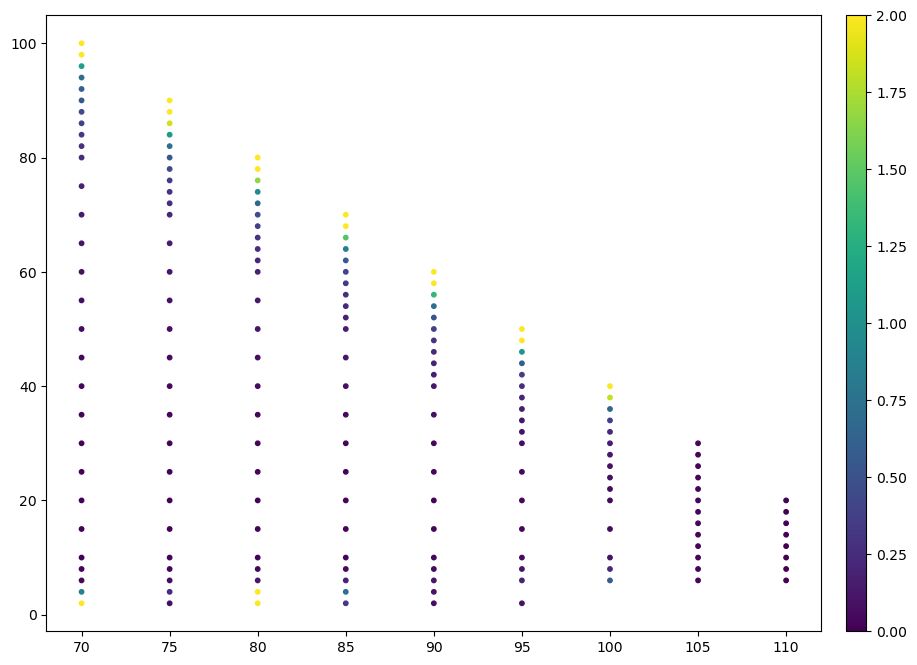

In [172]:

fig, ax = plt.subplots(figsize=(10,8))
im = plt.scatter(masses[:, 0], masses[:, 1], c=limits, cmap='viridis', s=10) 

im.set_clim(0, 2)
cax = fig.add_axes([ax.get_position().x1+0.025,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)




In [279]:
import numpy as np
import matplotlib.pyplot as plt
import json

with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240NewestData/scenario_1/run1/combine_SecondNoMllBelow30ForElec_noInterp/all_limits.json", "r") as f:
    all_limits_scen1 = json.load(f)

with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240NewestData/scenario_2/run1/combine_SecondNoMllBelow30ForElec_noInterp/all_limits.json", "r") as f:
    all_limits_scen2 = json.load(f)

with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240NewestData/scenario_3/run1/combine_SecondNoMllBelow30ForElec_noInterp/all_limits.json", "r") as f:
    all_limits_scen3 = json.load(f)


grid_central_scen1 = getGrid(all_limits_scen1, all_ms, '0.5')[0]
grid_central_scen2 = getGrid(all_limits_scen2, all_ms, '0.5')[0]
grid_central_scen3 = getGrid(all_limits_scen3, all_ms, '0.5')[0]


70.0 72.0
70.0 74.0
70.0 76.0
70.0 78.0
70.0 80.0
70.0 85.0
70.0 90.0
70.0 95.0
70.0 100.0
70.0 105.0
70.0 110.0
70.0 115.0
70.0 120.0
70.0 125.0
70.0 130.0
70.0 135.0
70.0 140.0
70.0 145.0
70.0 150.0
70.0 152.0
70.0 154.0
70.0 156.0
70.0 158.0
70.0 160.0
70.0 162.0
70.0 164.0
70.0 166.0
70.0 168.0
70.0 170.0
75.0 77.0
75.0 79.0
75.0 81.0
75.0 83.0
75.0 85.0
75.0 90.0
75.0 95.0
75.0 100.0
75.0 105.0
75.0 110.0
75.0 115.0
75.0 120.0
75.0 125.0
75.0 130.0
75.0 135.0
75.0 140.0
75.0 145.0
75.0 147.0
75.0 149.0
75.0 151.0
75.0 153.0
75.0 155.0
75.0 157.0
75.0 159.0
75.0 161.0
75.0 163.0
75.0 165.0
80.0 82.0
80.0 84.0
80.0 86.0
80.0 88.0
80.0 90.0
80.0 95.0
80.0 100.0
80.0 105.0
80.0 110.0
80.0 115.0
80.0 120.0
80.0 125.0
80.0 130.0
80.0 135.0
80.0 140.0
80.0 142.0
80.0 144.0
80.0 146.0
80.0 148.0
80.0 150.0
80.0 152.0
80.0 154.0
80.0 156.0
80.0 158.0
80.0 160.0
85.0 87.0
85.0 89.0
85.0 91.0
85.0 93.0
85.0 95.0
85.0 100.0
85.0 105.0
85.0 110.0
85.0 115.0
85.0 120.0
85.0 125.0
85.0 130.0
85.

Text(0.8, 0.4, 'Scenario 3:\n$M_{H^\\pm} = M_{H^\\pm}^{max}$\n$\\lambda_{345} = \\lambda_{max}$')

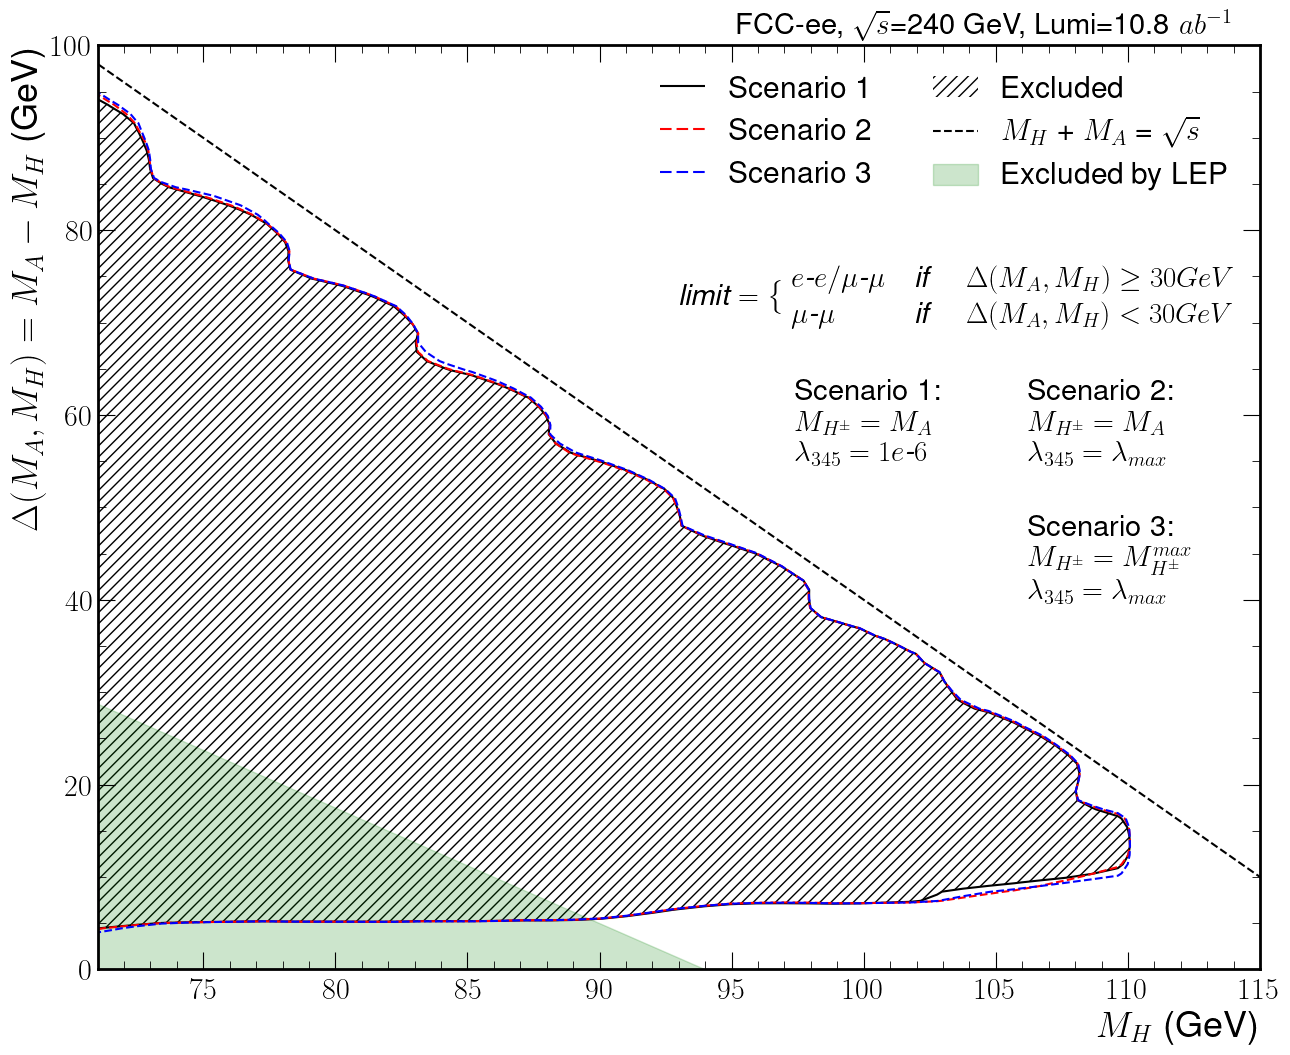

In [290]:
import matplotlib.pyplot as plt
import mplhep as hep 

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

ecom = 240

cmap = plt.cm.viridis
cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(15,12))
masked_array = np.ma.masked_where(np.ones_like(grid_central.T) * -1 == -1, grid_central.T)
im = ax.imshow(masked_array, extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), 
          origin='lower', cmap = cmap, aspect='auto')




con_filled = ax.contourf(grid_central.T, np.array([0, 1]), colors=['white', 'white'],
                   hatches = ['///', '//////'], levels=[-10, 1], alpha=1, origin='lower',
                    extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)))
handles_con_filled, labels_filled = con_filled.legend_elements()




con = ax.contour(grid_central.T, np.array([1]) , colors=['black'], linewidths=[1.5], 
                  extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), origin='lower')
handles_con, labels = con.legend_elements()

con_scen2 = ax.contour(grid_central_scen2.T, np.array([1]) , colors=['red'], linewidths=[1.5],
                    extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), 
                    origin='lower', linestyles='dashed')
handles_conscen2, labels_conscen2 = con_scen2.legend_elements()

con_scen3 = ax.contour(grid_central_scen3.T, np.array([1]) , colors=['blue'], linewidths=[1.5],
                    extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), 
                    origin='lower', linestyles='dashed')
handles_conscen3, labels_conscen3 = con_scen3.legend_elements()

line = ax.plot([70, 120], [100, 0], color='black', linestyle='--', label = f'$M_H$ + $M_A$ = {ecom} GeV')



# x = np.arange(50, 71, 1)
# y1 = (-5 / 4) * x + 117.5
# y2 = 400 * np.ones_like(x)
# excl_dm = plt.fill_between(x, y1, y2, color='blue', alpha=0.2, label = 'Excluded by DM Observations')
# #handles_excl_dm, labels_excl_dm = excl_dm.legend_elements()

x2 = np.arange(50, 95, 1)
y3 = (-5 / 4) * x2 + 117.5
y4 = 0 * np.ones_like(x2)
excl_LEP = plt.fill_between(x2, y3, y4, color='green', alpha=0.2, label = 'Excluded by LEP')

# legend_elements += [excl_dm, excl_LEP]
# legend_names += ["Relic Density", "LEP SUSY Recast"]



ax.legend(handles_con + handles_conscen2 + handles_conscen3 + handles_con_filled  + line + [excl_LEP],
          ["Scenario 1", "Scenario 2", "Scenario 3", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$', "Excluded by LEP"], 
          loc='upper right',ncol=2)


plt.ylim(0, 100)
plt.xlim(71, 115)


plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$=240 GeV,  Lumi=10.8 $ab^{-1}$", fontsize="21",
             transform=ax.transAxes)
eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")


plt.text(0.5, 0.72, eq1, fontsize="21",
             transform=ax.transAxes)


eq1 = ("Scenario 1:\n"
        r"$M_{H^\pm} = M_A$" + "\n"
        r"$\lambda_{345} = 1e\textit{-}6$")

plt.text(0.6, 0.55, eq1, fontsize="21",
             transform=ax.transAxes)



eq1 = ("Scenario 2:\n"
        r"$M_{H^\pm} = M_A$" + "\n"
        r"$\lambda_{345} = \lambda_{max}$")

plt.text(0.8, 0.55, eq1, fontsize="21",
             transform=ax.transAxes)

eq1 = ("Scenario 3:\n"
        r"$M_{H^\pm} = M_{H^\pm}^{max}$" + "\n"
        r"$\lambda_{345} = \lambda_{max}$")

plt.text(0.8, 0.40, eq1, fontsize="21",
             transform=ax.transAxes)

In [301]:
with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240NewestData/scenario_1/run1/combine_SecondNoMllBelow30ForElec_noInterp/all_signifs.json", "r") as f:
    all_sigs = json.load(f)


def getSigs(all_sigs, all_ms, method='cubic'):
    # Sort them in the correct order
    ind = np.lexsort((all_ms[:,1],all_ms[:,0]))    
    all_ms = all_ms[ind]

    sigs = []
    mHs = []
    diffs = []
    for mH, mA in all_ms:
        # if mA - mH <= 2:
        #     continue
        mHs.append(mH)
        diffs.append(mA - mH)

        if mA - mH <= 30:
            try: 
                sig = all_sigs[f"mH{mH}_mA{mA}"]['MuMu']
            except:
                sig = 2
        else:
            try:
                sig = all_sigs[f"mH{mH}_mA{mA}"]['combined']
            except:
                try:
                    sig = all_sigs[f"mH{mH}_mA{mA}"]['MuMu']
                except:
                    sig = 2

        sigs.append(sig)


    # Now get the grid
    sigs = np.array(sigs)
    mHs = np.array(mHs)
    diffs = np.array(diffs)

    # Now combine these so they are shape (n, 2)
    masses = np.vstack((mHs, diffs)).T

    grid_x, grid_y = np.meshgrid(np.arange(np.min(mHs), np.max(mHs) + 6, 1),
                                np.arange(0, np.max(diffs) + 1, 1), indexing='ij')



    grid = griddata(masses, sigs, (grid_x, grid_y), method=method)

    # # Make nan be 2
    # grid[grid > 1.5] = 1.5
    grid[np.isnan(grid)] = 0


    return grid, grid_x, grid_y


Text(0.5, 0.67, 'Scenario 1:\n$M_{H^\\pm} = M_A$\n$\\lambda_{345} = 1e\\textit{-}6$')

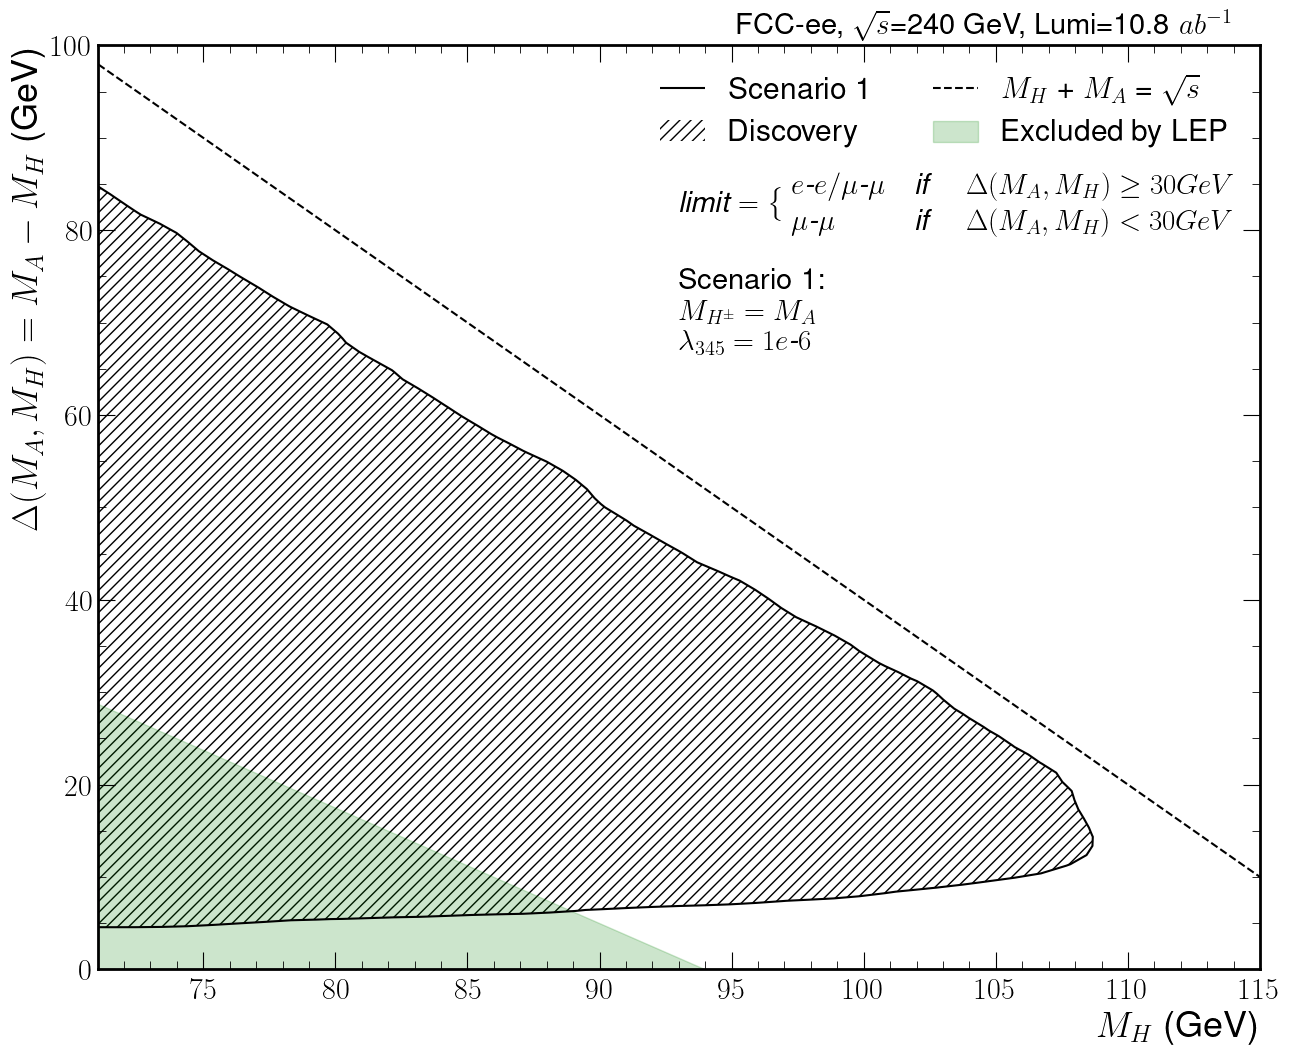

In [308]:
import matplotlib.pyplot as plt
import mplhep as hep 

grid, grid_x, grid_y = getSigs(all_sigs, all_ms)

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

ecom = 240

cmap = plt.cm.viridis
cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(15,12))
masked_array = np.ma.masked_where(np.ones_like(grid.T) * -1 == -1, grid.T)
im = ax.imshow(masked_array, extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), 
          origin='lower', cmap = cmap, aspect='auto')




con_filled = ax.contourf(grid.T, np.array([0, 1]), colors=['white', 'white'],
                   hatches = ['///', '//////'], levels=[5, np.inf], alpha=1, origin='lower',
                    extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)))
handles_con_filled, labels_filled = con_filled.legend_elements()




con = ax.contour(grid.T, np.array([5]) , colors=['black'], linewidths=[1.5], 
                  extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), origin='lower')
handles_con, labels = con.legend_elements()


line = ax.plot([70, 120], [100, 0], color='black', linestyle='--', label = f'$M_H$ + $M_A$ = {ecom} GeV')



# x = np.arange(50, 71, 1)
# y1 = (-5 / 4) * x + 117.5
# y2 = 400 * np.ones_like(x)
# excl_dm = plt.fill_between(x, y1, y2, color='blue', alpha=0.2, label = 'Excluded by DM Observations')
# #handles_excl_dm, labels_excl_dm = excl_dm.legend_elements()

x2 = np.arange(50, 95, 1)
y3 = (-5 / 4) * x2 + 117.5
y4 = 0 * np.ones_like(x2)
excl_LEP = plt.fill_between(x2, y3, y4, color='green', alpha=0.2, label = 'Excluded by LEP')

# legend_elements += [excl_dm, excl_LEP]
# legend_names += ["Relic Density", "LEP SUSY Recast"]



ax.legend(handles_con + handles_con_filled  + line + [excl_LEP],
          ["Scenario 1",  "Discovery", '$M_H$ + $M_A$ = $\sqrt{s}$', "Excluded by LEP"], 
          loc='upper right',ncol=2)


plt.ylim(0, 100)
plt.xlim(71, 115)


plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$=240 GeV,  Lumi=10.8 $ab^{-1}$", fontsize="21",
             transform=ax.transAxes)
eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")


plt.text(0.5, 0.82, eq1, fontsize="21",
             transform=ax.transAxes)


eq1 = ("Scenario 1:\n"
        r"$M_{H^\pm} = M_A$" + "\n"
        r"$\lambda_{345} = 1e\textit{-}6$")

plt.text(0.5, 0.67, eq1, fontsize="21",
             transform=ax.transAxes)


In [309]:
with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240NewestData/scenario_1/run1/combine_SecondNoMllBelow30ForElec_noInterp/all_signifs.json", "r") as f:
    all_sigs = json.load(f)

with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240NewestData/scenario_2/run1/combine_SecondNoMllBelow30ForElec_noInterp/all_signifs.json", "r") as f:
    all_sig_scen2 = json.load(f)

with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240NewestData/scenario_3/run1/combine_SecondNoMllBelow30ForElec_noInterp/all_signifs.json", "r") as f:
    all_sig_scen3 = json.load(f)



grid, grid_x, grid_y = getSigs(all_sigs, all_ms)
grid_scen2, grid_x, grid_y = getSigs(all_sig_scen2, all_ms)
grid_scen3, grid_x, grid_y = getSigs(all_sig_scen3, all_ms)



Text(0.8, 0.4, 'Scenario 3:\n$M_{H^\\pm} = M_{H^\\pm}^{max}$\n$\\lambda_{345} = \\lambda_{max}$')

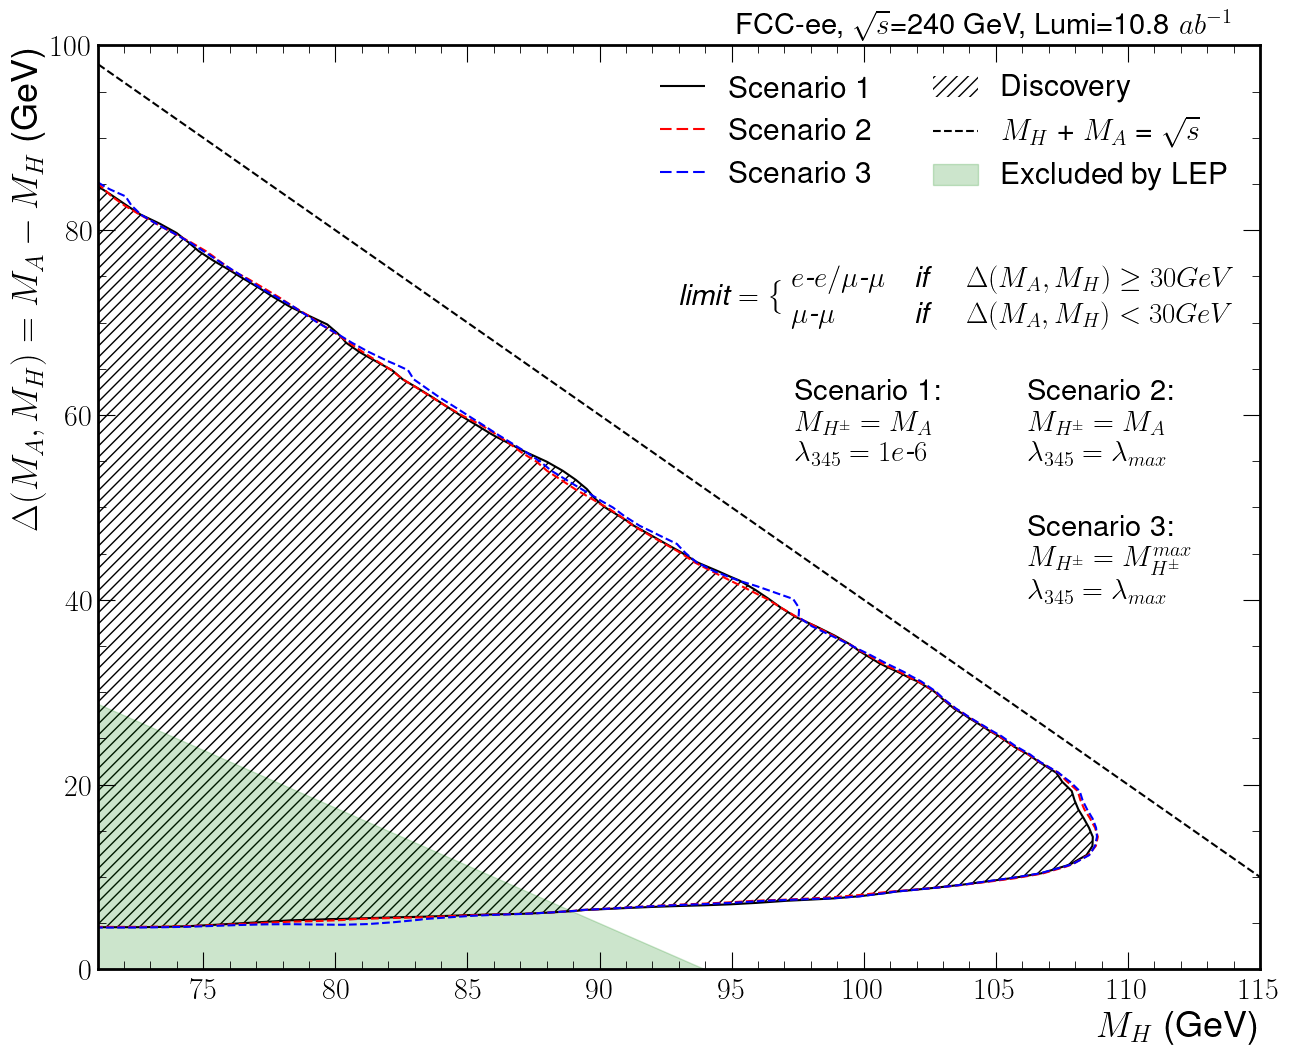

In [311]:
import matplotlib.pyplot as plt
import mplhep as hep 

grid, grid_x, grid_y = getSigs(all_sigs, all_ms)

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

ecom = 240

cmap = plt.cm.viridis
cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(15,12))
masked_array = np.ma.masked_where(np.ones_like(grid.T) * -1 == -1, grid.T)
im = ax.imshow(masked_array, extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), 
          origin='lower', cmap = cmap, aspect='auto')




con_filled = ax.contourf(grid.T, np.array([0, 1]), colors=['white', 'white'],
                   hatches = ['///', '//////'], levels=[5, np.inf], alpha=1, origin='lower',
                    extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)))
handles_con_filled, labels_filled = con_filled.legend_elements()




con = ax.contour(grid.T, np.array([5]) , colors=['black'], linewidths=[1.5], 
                  extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)), origin='lower')
handles_con, labels = con.legend_elements()

con_scen2 = ax.contour(grid_scen2.T, np.array([5]) , colors=['red'], linewidths=[1.5],
                        extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)),
                        origin='lower', linestyles='dashed')
handles_conscen2, labels_conscen2 = con_scen2.legend_elements()

con_scen3 = ax.contour(grid_scen3.T, np.array([5]) , colors=['blue'], linewidths=[1.5],
                        extent=(np.min(mHs), np.max(mHs) + 5, 0, np.max(diffs)),
                        origin='lower', linestyles='dashed')
handles_conscen3, labels_conscen3 = con_scen3.legend_elements()




line = ax.plot([70, 120], [100, 0], color='black', linestyle='--', label = f'$M_H$ + $M_A$ = {ecom} GeV')



x2 = np.arange(50, 95, 1)
y3 = (-5 / 4) * x2 + 117.5
y4 = 0 * np.ones_like(x2)
excl_LEP = plt.fill_between(x2, y3, y4, color='green', alpha=0.2, label = 'Excluded by LEP')


ax.legend(handles_con + handles_conscen2 + handles_conscen3 + handles_con_filled  + line + [excl_LEP],
          ["Scenario 1", "Scenario 2", "Scenario 3", "Discovery", '$M_H$ + $M_A$ = $\sqrt{s}$', "Excluded by LEP"], 
          loc='upper right',ncol=2)


plt.ylim(0, 100)
plt.xlim(71, 115)


plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$=240 GeV,  Lumi=10.8 $ab^{-1}$", fontsize="21",
             transform=ax.transAxes)
eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")


plt.text(0.5, 0.72, eq1, fontsize="21",
             transform=ax.transAxes)


eq1 = ("Scenario 1:\n"
        r"$M_{H^\pm} = M_A$" + "\n"
        r"$\lambda_{345} = 1e\textit{-}6$")

plt.text(0.6, 0.55, eq1, fontsize="21",
             transform=ax.transAxes)



eq1 = ("Scenario 2:\n"
        r"$M_{H^\pm} = M_A$" + "\n"
        r"$\lambda_{345} = \lambda_{max}$")

plt.text(0.8, 0.55, eq1, fontsize="21",
             transform=ax.transAxes)

eq1 = ("Scenario 3:\n"
        r"$M_{H^\pm} = M_{H^\pm}^{max}$" + "\n"
        r"$\lambda_{345} = \lambda_{max}$")

plt.text(0.8, 0.40, eq1, fontsize="21",
             transform=ax.transAxes)

In [ ]:
def getGrid(all_limits, all_ms, lim_val, method = 'cubic'):
    # Sort them in the correct order
    ind = np.lexsort((all_ms[:,1],all_ms[:,0]))    
    all_ms = all_ms[ind]
    
    limits = []
    mHs = []
    diffs = []
    for mH, mA in all_ms:
        # if mA - mH <= 2:
        #     continue
        mHs.append(mH)
        diffs.append(mA - mH)
        print(mH, mA)

        if mA - mH <= 30:
            try: 
                lim = all_limits[f"mH{mH}_mA{mA}"]['MuMu'][lim_val]
            except:
                lim = 2
        else:
            try:
                lim = all_limits[f"mH{mH}_mA{mA}"]['combined'][lim_val]
            except:
                try:
                    lim = all_limits[f"mH{mH}_mA{mA}"]['MuMu'][lim_val]
                except:
                    lim = 2

        limits.append(lim)

    # Now get the grid
    limits = np.array(limits)
    mHs = np.array(mHs)
    diffs = np.array(diffs)

    # Now combine these so they are shape (n, 2)
    masses = np.vstack((mHs, diffs)).T
    limits[limits > 1.5] = 1.5

    grid_x, grid_y = np.meshgrid(np.arange(np.min(mHs), np.max(mHs) + 6, 1),
                                np.arange(0, np.max(diffs) + 1, 1), indexing='ij')



    grid = griddata(masses, limits, (grid_x, grid_y), method=method)

    # Make nan be 2
    grid[grid > 1.5] = 1.5
    grid[np.isnan(grid)] = 1.5

    return grid, grid_x, grid_y

In [27]:
all_ms
diffs = all_ms[:,1] - all_ms[:,0]
np.unique(diffs)

array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  15.,  16.,  18.,  20.,
        22.,  24.,  25.,  26.,  28.,  30.,  32.,  34.,  35.,  36.,  38.,
        40.,  42.,  44.,  45.,  46.,  48.,  50.,  52.,  54.,  55.,  56.,
        58.,  60.,  62.,  64.,  65.,  66.,  68.,  70.,  72.,  74.,  75.,
        76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,
        98., 100.])

In [28]:
all_ms

array([[ 70.,  72.],
       [ 70.,  74.],
       [ 70.,  76.],
       [ 70.,  78.],
       [ 70.,  80.],
       [ 70.,  85.],
       [ 70.,  90.],
       [ 70.,  95.],
       [ 70., 100.],
       [ 70., 105.],
       [ 70., 110.],
       [ 70., 115.],
       [ 70., 120.],
       [ 70., 125.],
       [ 70., 130.],
       [ 70., 135.],
       [ 70., 140.],
       [ 70., 145.],
       [ 70., 150.],
       [ 70., 152.],
       [ 70., 154.],
       [ 70., 156.],
       [ 70., 158.],
       [ 70., 160.],
       [ 70., 162.],
       [ 70., 164.],
       [ 70., 166.],
       [ 70., 168.],
       [ 70., 170.],
       [ 75.,  77.],
       [ 75.,  79.],
       [ 75.,  81.],
       [ 75.,  83.],
       [ 75.,  85.],
       [ 75.,  90.],
       [ 75.,  95.],
       [ 75., 100.],
       [ 75., 105.],
       [ 75., 110.],
       [ 75., 115.],
       [ 75., 120.],
       [ 75., 125.],
       [ 75., 130.],
       [ 75., 135.],
       [ 75., 140.],
       [ 75., 145.],
       [ 75., 147.],
       [ 75.,

In [ ]:

mHs = np.unique(all_ms[:, 0])
# For a single mH, get the values of mA - mH
diff_scan = all_ms[all_ms[:, 0] == mHs[0], 1] - mHs[0]

# Now need to make a 2d grid to store the limits
grid = np.zeros((len(diff_scan), len(mHs)))

In [19]:
diff_scan

array([  2.,   4.,   6.,   8.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
        45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100.])

In [20]:
len(grid)

29

In [21]:
plot_grid = np.ones((len(diff_scan)+1, len(mHs))) * -1
plot_grid_for_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10      
plot_grid_for_up_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 
plot_grid_for_down_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 

for mass_point, limit_dict in all_limits.items():
    print(mass_point)
    mH = float(mass_point.split("_")[0].split("mH")[1])
    mA = float(mass_point.split("mA")[1])

    print(mH, mA)

    if mA - mH <= 30:
        # if small mass splitting then use the muon limits
        limits = limit_dict["MuMu"]
    else:

        try:
            limits = limit_dict['combined']
        except:
            limits = limit_dict["MuMu"]


    
    # limits = f["limit"]["limit"].array()
    limits = fillMissingLimits(limits)

    #! To change, this is just for Mu-Mu case
    limits = limit_dict["MuMu"]

    try:
        limit = limits['0.5']
    except:
        print(f"Couldn't find 0.5 limit for {mass_point}, skipping for now")
        limits = {
            0.5 : 0, 0.84 : 0, 0.16 : 0
        }
        # continue

    if '0.84' not in limits:
        limits['0.84'] = 0


    deltaAH = int(mA - mH)


    row_idx = len(diff_scan) - np.where(diff_scan == mA - mH)[0][0]
    col_idx = np.where(mHs == mH)[0][0]

    #print(mH, mA, deltaAH)  

    #print(row_idx, col_idx)

    plot_grid[row_idx, col_idx] = limit

    plot_grid_for_contour[row_idx, col_idx] = limit

    plot_grid_for_up_contour[row_idx, col_idx] = limits['0.84']
    plot_grid_for_down_contour[row_idx, col_idx] = limits['0.16']

    


mH100.0_mA106.0
100.0 106.0
mH100.0_mA108.0
100.0 108.0
mH100.0_mA110.0
100.0 110.0
mH100.0_mA115.0
100.0 115.0
mH100.0_mA120.0
100.0 120.0
mH100.0_mA122.0
100.0 122.0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [22]:
mA - mH

22.0

In [23]:
diff_scan 

array([  2.,   4.,   6.,   8.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
        45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100.])

In [40]:
# Now need to make a 2d grid to store the limits
grid = np.zeros((len(diff_scan), len(mHs)))


plot_grid = np.ones((len(diff_scan)+1, len(mHs))) * -1
plot_grid_for_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10      
plot_grid_for_up_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 
plot_grid_for_down_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 

for mass_point, limit_dict in all_limits.items():
    mH = float(mass_point.split("_")[0].split("mH")[1])
    mA = float(mass_point.split("mA")[1])

    if mA - mH <= 30:
        # if small mass splitting then use the muon limits
        limits = limit_dict["MuMu"]
    else:

        try:
            limits = limit_dict['combined']
        except:
            limits = limit_dict["MuMu"]


    
    # limits = f["limit"]["limit"].array()
    limits = fillMissingLimits(limits)

    # #! To change, this is just for Mu-Mu case
    # limits = limit_dict["MuMu"]

    try:
        limit = limits['0.5']
    except:
        print(f"Couldn't find 0.5 limit for {mass_point}, skipping for now")
        limits = {
            0.5 : 0, 0.84 : 0, 0.16 : 0
        }
        # continue

    if '0.84' not in limits:
        limits['0.84'] = 0


    deltaAH = int(mA - mH)

    row_idx = len(diff_scan) - np.where(diff_scan == mA - mH)[0][0]
    col_idx = np.where(mHs == mH)[0][0]

    #print(mH, mA, deltaAH)  

    #print(row_idx, col_idx)

    plot_grid[row_idx, col_idx] = limit

    plot_grid_for_contour[row_idx, col_idx] = limit

    plot_grid_for_up_contour[row_idx, col_idx] = limits['0.84']
    plot_grid_for_down_contour[row_idx, col_idx] = limits['0.16']

    
dx = (mHs[1]-mHs[0])/2.
dy = (diff_scan[1]-diff_scan[0])/2.
extent = [mHs[0]-dx, mHs[-1]+dx, diff_scan[0]-dy, diff_scan[-1]+dy]

In [46]:
with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240_full_run_fixedLumis/run1/combine_grid_space_2.5/all_limits.json", "r") as f:
    all_limits_other = json.load(f)

# Now need to make a 2d grid to store the limits
grid = np.zeros((len(diff_scan), len(mHs)))


plot_grid_other = np.ones((len(diff_scan)+1, len(mHs))) * -1
plot_grid_other_for_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10      
plot_grid_other_for_up_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 
plot_grid_other_for_down_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 

for mass_point, limit_dict in all_limits_other.items():
    mH = float(mass_point.split("_")[0].split("mH")[1])
    mA = float(mass_point.split("mA")[1])

    if mA - mH <= 30:
        # if small mass splitting then use the muon limits
        limits = limit_dict["MuMu"]
    else:

        try:
            limits = limit_dict['combined']
        except:
            limits = limit_dict["MuMu"]


    
    # limits = f["limit"]["limit"].array()
    limits = fillMissingLimits(limits)

    # #! To change, this is just for Mu-Mu case
    # limits = limit_dict["MuMu"]

    try:
        limit = limits['0.5']
    except:
        print(f"Couldn't find 0.5 limit for {mass_point}, skipping for now")
        limits = {
            0.5 : 0, 0.84 : 0, 0.16 : 0
        }
        # continue

    if '0.84' not in limits:
        limits['0.84'] = 0


    deltaAH = int(mA - mH)

    row_idx = len(diff_scan) - np.where(diff_scan == mA - mH)[0][0]
    col_idx = np.where(mHs == mH)[0][0]

    #print(mH, mA, deltaAH)  

    #print(row_idx, col_idx)

    plot_grid_other[row_idx, col_idx] = limit

    plot_grid_other_for_contour[row_idx, col_idx] = limit

    plot_grid_other_for_up_contour[row_idx, col_idx] = limits['0.84']
    plot_grid_other_for_down_contour[row_idx, col_idx] = limits['0.16']

    
dx = (mHs[1]-mHs[0])/2.
dy = (diff_scan[1]-diff_scan[0])/2.
extent = [mHs[0]-dx, mHs[-1]+dx, diff_scan[0]-dy, diff_scan[-1]+dy]


In [42]:
ecom = 240
skipSigmaBands = False
lumi = 1
plot_excluded = True

max_mH = 115.0


/tmp/ipykernel_997086/1303594730.py:26: UserWarning: The following kwargs were not used by contour: 'linestyle'
  con_other = plt.contour(plot_grid_other_for_contour, np.array([1]) , colors=['red'], linewidths=[2], extent=extent, origin='upper', linestyle=['--'])


Text(0.445, 0.77, '\\begin{eqnarray*}\\textit{limit} = \\Biggl\\{  \\begin{array}{l} e\\textit{-}e/\\mu\\textit{-}\\mu \\quad \\textit{if}\\ \\quad \\Delta(M_A,M_H) \\geq 30 GeV\\\\  \\mu\\textit{-}\\mu \\quad \\quad \\; \\; \\, \\textit{if}\\ \\quad \\Delta(M_A,M_H) < 30 GeV\\end{array}\\end{eqnarray*}')

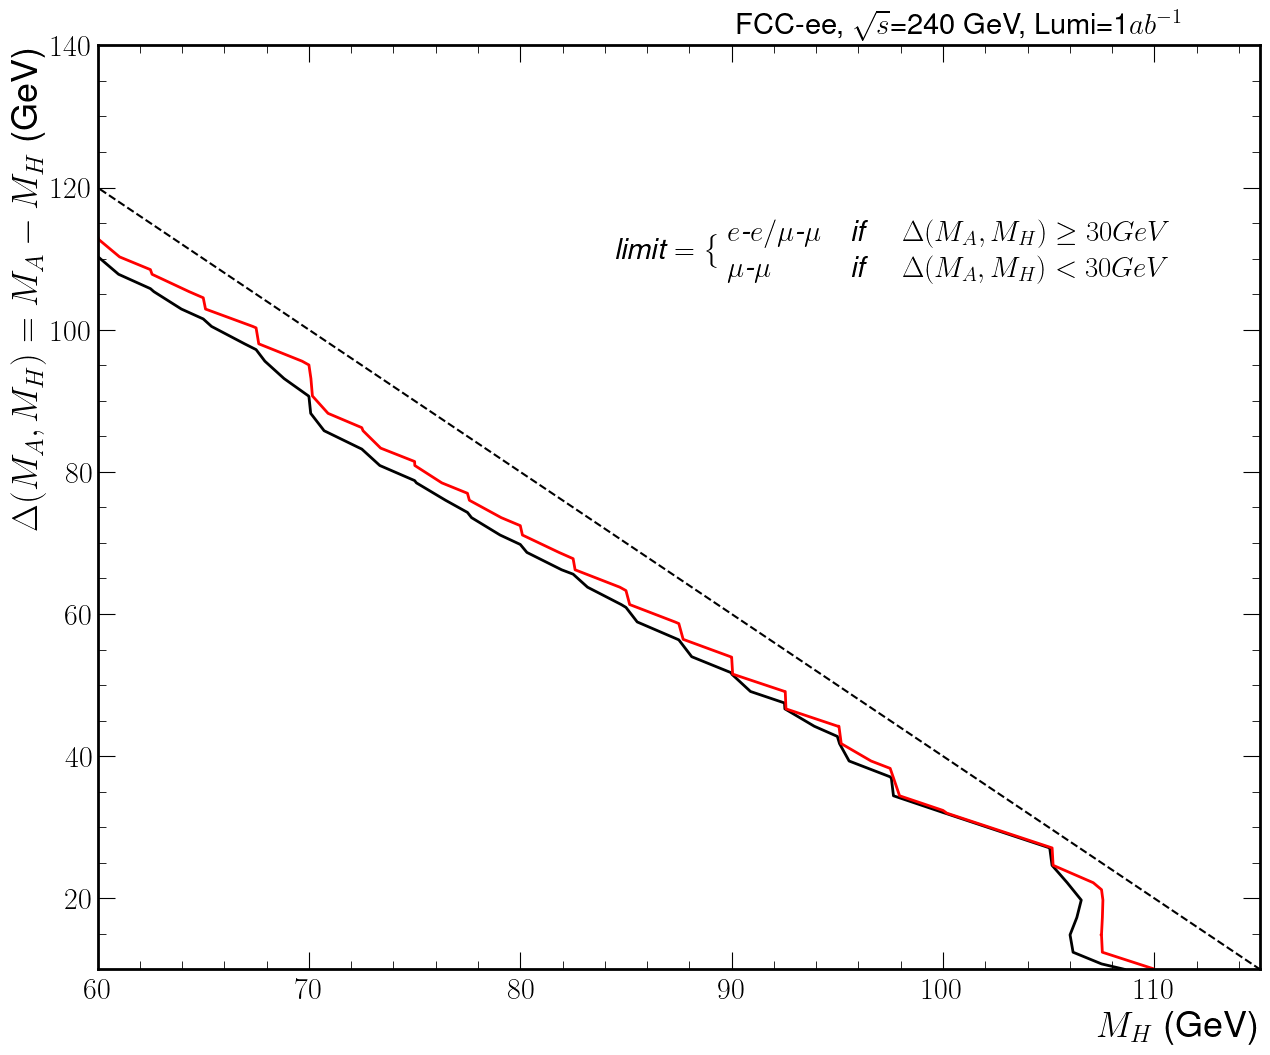

In [49]:
import mplhep as hep

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(15,12))

cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(np.ones_like(plot_grid) * -1 == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto', extent=extent)


max_mH = (ecom - np.min(diff_scan)) / 2
print(f"max_mH = {max_mH}")

line = plt.plot([np.min(mHs), max_mH], [ecom - 2 * np.min(mHs), np.min(diff_scan)], color='black', linestyle='--', label = f'$M_H$ + $M_A$ = {ecom} GeV')
plt.xlim(60, max_mH)
plt.ylim(np.min(diff_scan), ecom - 2 * np.min(mHs))



con = plt.contour(plot_grid_for_contour, np.array([1]) , colors=['black'], linewidths=[2], extent=extent, origin='upper')
handles_con, labels = con.legend_elements()

con_other = plt.contour(plot_grid_other_for_contour, np.array([1]) , colors=['red'], linewidths=[2], extent=extent, origin='upper', linestyle=['--'])
handles_con_other, labels_other = con_other.legend_elements()

# con_filled = plt.contourf(plot_grid_for_contour, np.array([0, 1]), colors=['white', 'white'],
#                 hatches = ['///', '//////'], levels=[0, 1], alpha=0.5, extent=extent, origin='upper')
# handles_con_filled, labels_filled = con_filled.legend_elements()

# legend_elements = []
# legend_names = []

# if not skipSigmaBands:
#     con_up = plt.contour(plot_grid_for_up_contour, np.array([1]) , colors=['red'], 
#                         linewidths=[2], linestyles=['--'], extent=extent, origin='upper')
#     handles_con_up, labels_con_up = con_up.legend_elements()

#     con_down = plt.contour(plot_grid_for_down_contour, np.array([1]) , colors=['red'], 
#                         linewidths=[2], linestyles=['--'], extent=extent, origin='upper')
#     handles_con_down, labels_con_down = con_down.legend_elements()

#     legend_elements += handles_con + handles_con_up + handles_con_filled  + line
#     legend_names += ["Expected 95% CL", "$\pm 1 \sigma$", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$']


# else:
#     legend_elements + handles_con + handles_con_filled  + line
#     legend_names += ["Expected 95% CL", "$\pm 1 \sigma$", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$']
    




# if plot_excluded:
#     x = np.arange(50, 71, 1)
#     y1 = (-5 / 4) * x + 117.5
#     y2 = 150 * np.ones_like(x)
#     excl_dm = plt.fill_between(x, y1, y2, color='blue', alpha=0.2, label = 'Excluded by DM Observations')
#     #handles_excl_dm, labels_excl_dm = excl_dm.legend_elements()

#     x2 = np.arange(50, 91, 1)
#     y3 = (-5 / 4) * x2 + 117.5
#     y4 = 10 * np.ones_like(x2)
#     excl_LEP = plt.fill_between(x2, y3, y4, color='green', alpha=0.2, label = 'Excluded by LEP')

#     legend_elements += [excl_dm, excl_LEP]
#     legend_names += ["Relic Density", "LEP SUSY Recast"]

# ax.legend(legend_elements, 
#           legend_names, 
#           loc='upper right', ncol=2)

plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$" + f"={ecom} GeV,  " + f"Lumi={lumi}" + "$ab^{-1}$", fontsize="21",
             transform=ax.transAxes)


eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")
plt.text(0.445, 0.77, eq1, fontsize="21",
             transform=ax.transAxes)



In [30]:
excl_dm?

Type:            PolyCollection
String form:     <matplotlib.collections.PolyCollection object at 0x7f8a28f126d0>
File:            ~/micromamba/envs/FCC-forAMstudent/lib/python3.9/site-packages/matplotlib/collections.py
Docstring:       <no docstring>
Class docstring: Base class for collections that have an array of sizes.
Init docstring: 
Parameters
----------
verts : list of array-like
    The sequence of polygons [*verts0*, *verts1*, ...] where each
    element *verts_i* defines the vertices of polygon *i* as a 2D
    array-like of shape (M, 2).
sizes : array-like, default: None
    Squared scaling factors for the polygons. The coordinates of each
    polygon *verts_i* are multiplied by the square-root of the
    corresponding entry in *sizes* (i.e., *sizes* specify the scaling
    of areas). The scaling is applied before the Artist master
    transform.
closed : bool, default: True
    Whether the polygon should be closed by adding a CLOSEPOLY
    connection at the end.
**kwargs
  

max_mH = 177.5


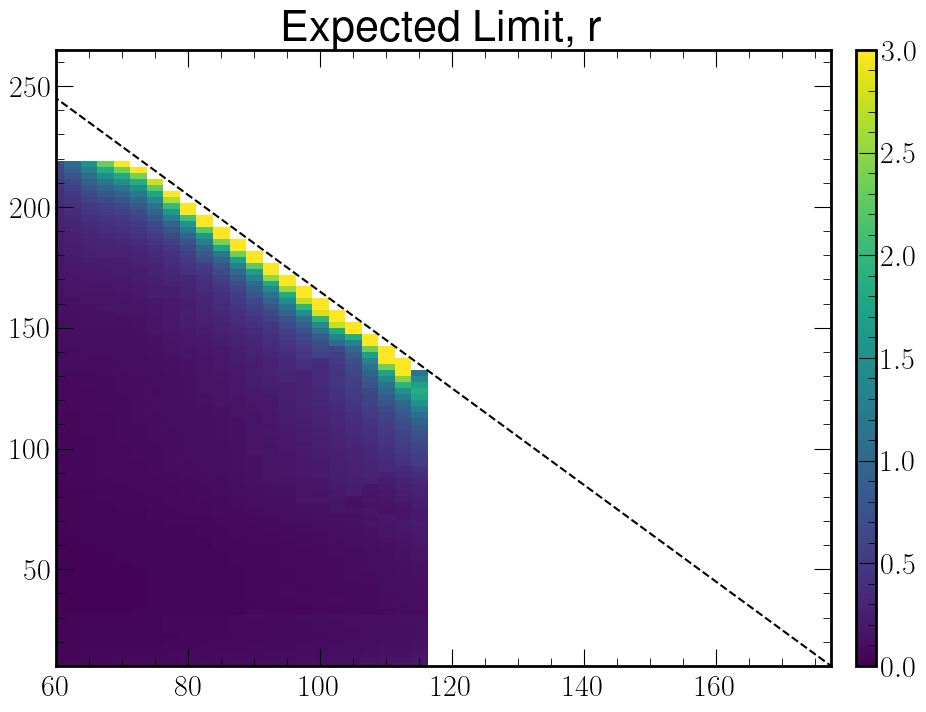

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(plot_grid == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto', extent=extent)

max_mH = (ecom - np.min(diff_scan)) / 2
print(f"max_mH = {max_mH}")

line = plt.plot([np.min(mHs), max_mH], [ecom - 2 * np.min(mHs), np.min(diff_scan)], color='black', linestyle='--', label = f'$M_H$ + $M_A$ = {ecom} GeV')
plt.xlim(60, max_mH)
plt.ylim(np.min(diff_scan), ecom - 2 * np.min(mHs))


# # Show all ticks and label them with the respective list entries
# sep = 5
# # Locations of the yticks
# yticks_loc = np.arange(1, 46, 2)
# yticks_names = np.arange(120, 5, -5) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
# ax.set_yticks(yticks_loc, labels=yticks_names)
# xticks_loc = np.arange(0, 25, 2)
# xticks_names = np.arange(50, 115, 5)
# ax.set_xticks(xticks_loc, labels=xticks_names)


# plt.ylim(45, 0.1)


# con = plt.contour(plot_grid_for_contour, np.array([0.5]) , colors=['red'], linewidths=[2])
# handles_con, labels_up = con.legend_elements()


# ax.legend(handles_con,
#           ["Expected 95% CL"], loc='center left')


im.set_clim(0, 3)

# plt.xlabel("mH")
# plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H (GeV)$")   

plt.title("Expected Limit, r")
cax = fig.add_axes([ax.get_position().x1+0.025,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)

Text(0.5, 0.73, '\\begin{eqnarray*}\\textit{limit} = \\Biggl\\{  \\begin{array}{l} e\\textit{-}e/\\mu\\textit{-}\\mu \\quad \\textit{if}\\ \\quad \\Delta(M_A,M_H) \\geq 30 GeV\\\\  \\mu\\textit{-}\\mu \\quad \\quad \\; \\; \\, \\textit{if}\\ \\quad \\Delta(M_A,M_H) < 30 GeV\\end{array}\\end{eqnarray*}')

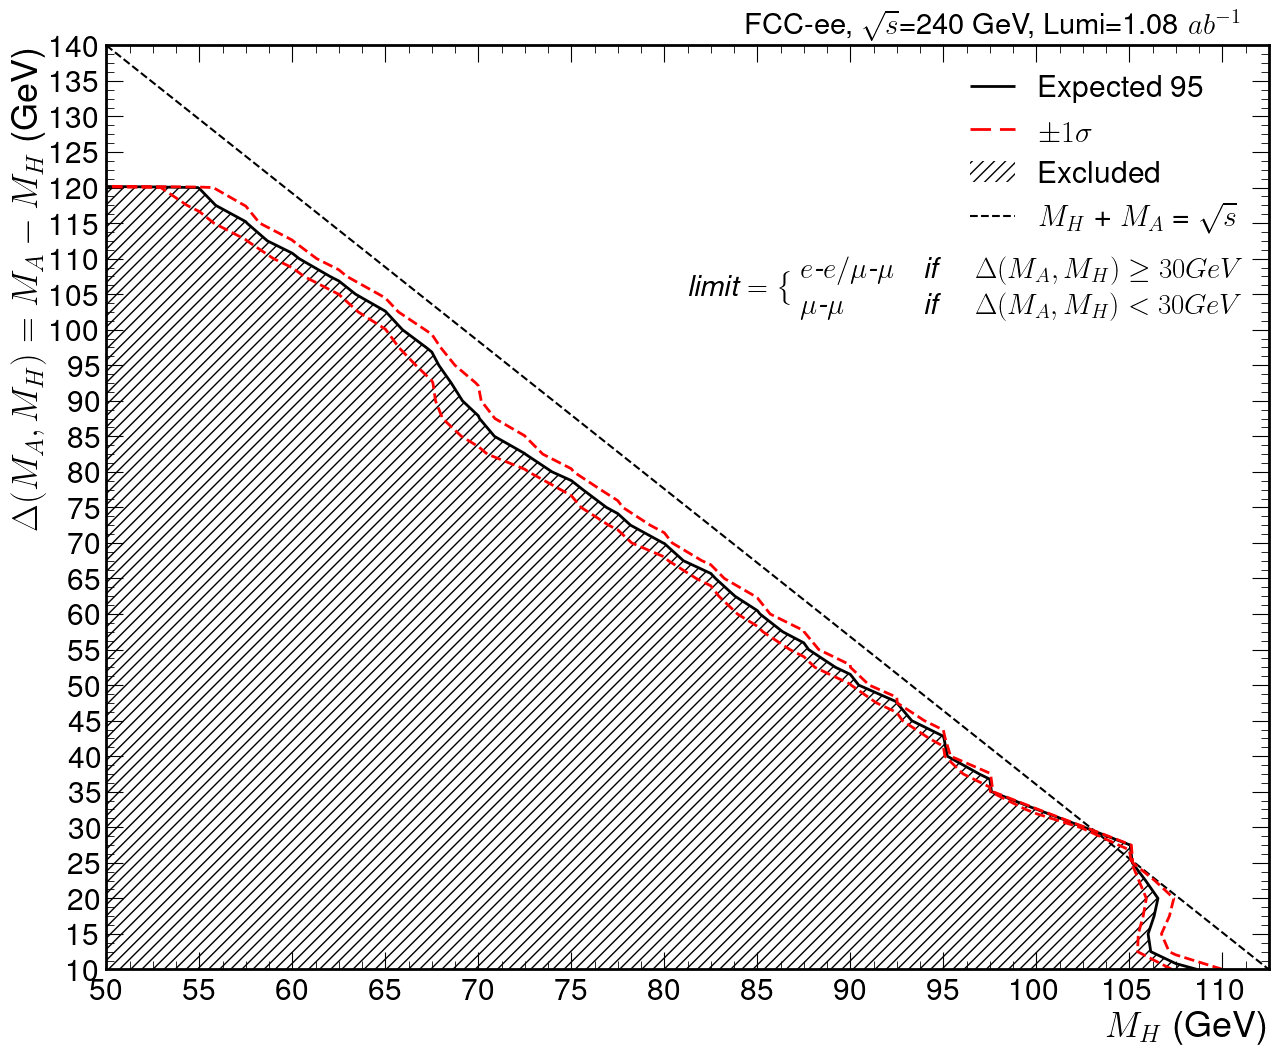

In [20]:
import mplhep as hep

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(15,12))

cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(np.ones_like(plot_grid) * -1 == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')

line = plt.plot([0, 25], [-7, 45], color='black', linestyle='--', label = '$M_H$ + $M_A$ = 240 GeV')

# Show all ticks and label them with the respective list entries
yticks_loc = np.arange(-7, 46, 2)
yticks_names = np.arange(140, 5, -5) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
ax.set_yticks(yticks_loc, labels=yticks_names)
xticks_loc = np.arange(0, 27, 2)
xticks_names = np.arange(50, 120, 5)
ax.set_xticks(xticks_loc, labels=xticks_names)



plt.ylim(45, -7)


# plt.ylim(41, 0)
plt.xlim(0, 25)


#plt.contour(plot_grid, np.array([1]) , colors=['yellow'], linewidths=[5])

con = plt.contour(plot_grid_for_contour, np.array([1]) , colors=['black'], linewidths=[2])
handles_con, labels = con.legend_elements()

con_up = plt.contour(plot_grid_for_up_contour, np.array([1]) , colors=['red'], 
                     linewidths=[2], linestyles=['--'])
handles_con_up, labels_con_up = con_up.legend_elements()

con_down = plt.contour(plot_grid_for_down_contour, np.array([1]) , colors=['red'], 
                     linewidths=[2], linestyles=['--'])
handles_con_down, labels_con_down = con_down.legend_elements()

con_filled = plt.contourf(plot_grid_for_contour, np.array([0, 1]), colors=['white', 'white'],
                   hatches = ['///', '//////'], levels=[0, 1], alpha=0.5)
handles_con_filled, labels_filled = con_filled.legend_elements()

ax.legend(handles_con + handles_con_up + handles_con_filled  + line,
          ["Expected 95% CL", "$\pm 1 \sigma$", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$'], 
          loc='upper right')


plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$=240 GeV,  Lumi=1.08 $ab^{-1}$", fontsize="21",
             transform=ax.transAxes)

# Plot diagonal line for mA + mH = 240
#plt.plot([25, 0], [0, 25], color='black', linestyle='--')


eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")
plt.text(0.5, 0.73, eq1, fontsize="21",
             transform=ax.transAxes)
# plt.savefig("limit.pdf", bbox_inches='tight')
#plt.title("Expected Limit, r")



In [16]:
dir(handles_con_up)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [68]:
# Now for the significance
with open(f"/vols/cms/emc21/FCC/FCC-Study/runs/e240_full_run_fixedLumis/run1/combine_grid_space_2.5_scaled0.01/all_signifs.json", "r") as f:
    all_signifs = json.load(f)


plot_grid = np.ones((len(diff_scan)+1, len(mHs))) * -1
plot_grid_for_contour = np.ones((len(diff_scan)+1, len(mHs))) * -1      

for mass_point, signif_dict in all_signifs.items():
    mH = float(mass_point.split("_")[0].split("mH")[1])
    mA = float(mass_point.split("mA")[1])


    #! To change, this is just for Mu-Mu case
    # print(mass_point)
    # try:
    #     signif = signif_dict["combined"]
    # except:
    #     signif = signif_dict["MuMu"]

    signif = signif_dict["MuMu"]

    deltaAH = int(mA - mH)

    row_idx = 100 - deltaAH
    col_idx = mH - 70
    row_idx = len(diff_scan) - np.where(diff_scan == mA - mH)[0][0]
    col_idx = np.where(mHs == mH)[0][0]

    #print(mH, mA, deltaAH)  

    #print(row_idx, col_idx)

    plot_grid[row_idx, col_idx] = signif

    plot_grid_for_contour[row_idx, col_idx] = signif

    


Text(0.5, 0.73, '\\begin{eqnarray*}\\textit{limit} = \\Biggl\\{  \\begin{array}{l} e\\textit{-}e/\\mu\\textit{-}\\mu \\quad \\textit{if}\\ \\quad \\Delta(M_A,M_H) \\geq 30 GeV\\\\  \\mu\\textit{-}\\mu \\quad \\quad \\; \\; \\, \\textit{if}\\ \\quad \\Delta(M_A,M_H) < 30 GeV\\end{array}\\end{eqnarray*}')

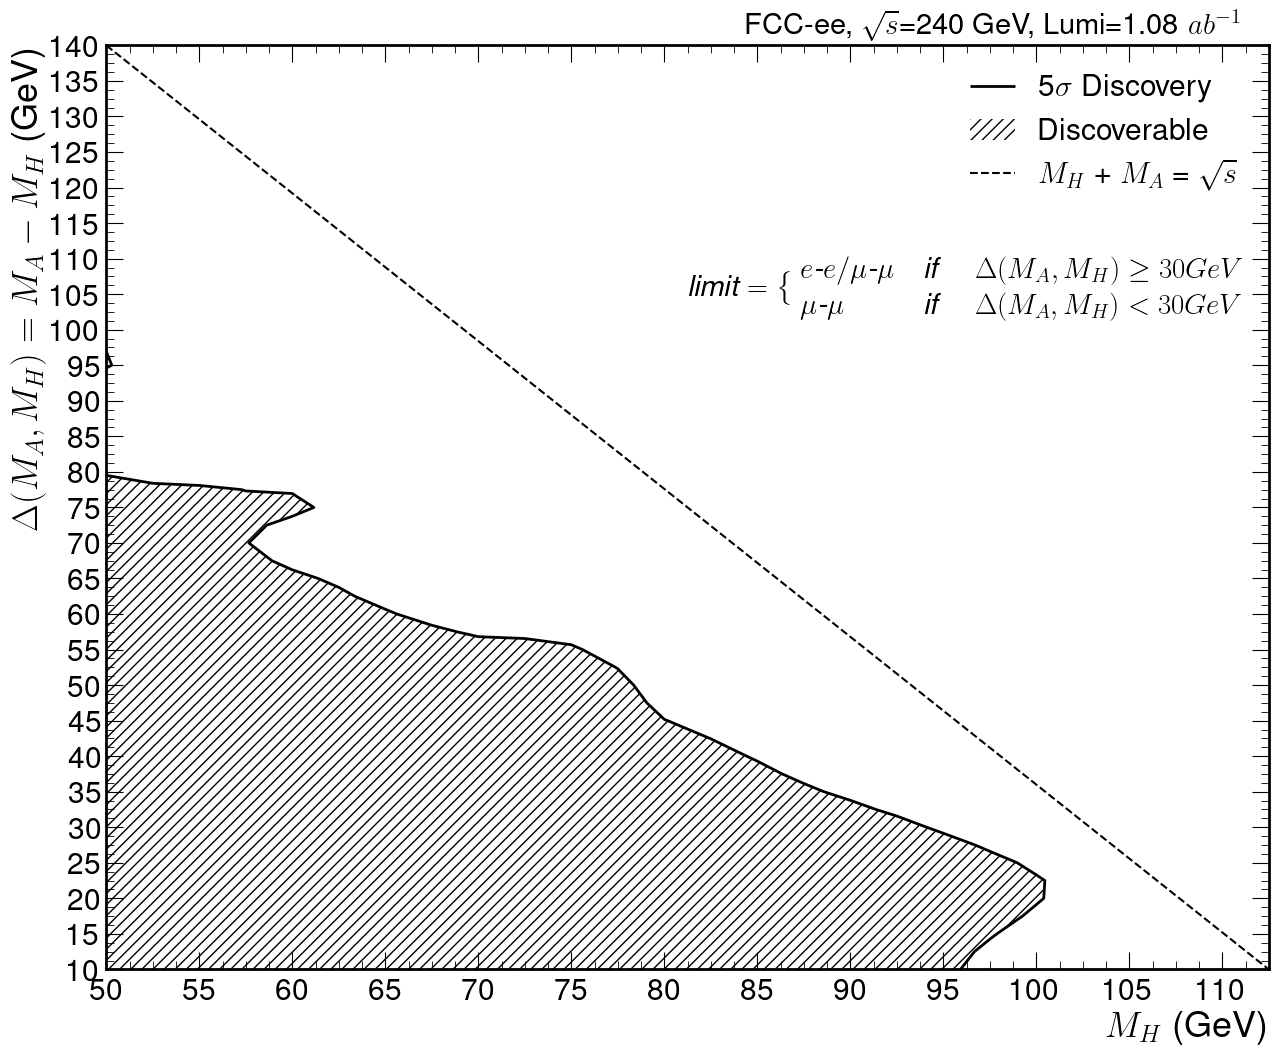

In [69]:
import mplhep as hep

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(15,12))

cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(np.ones_like(plot_grid) * -1 == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')

line = plt.plot([0, 25], [-7, 45], color='black', linestyle='--', label = '$M_H$ + $M_A$ = 240 GeV')

# Show all ticks and label them with the respective list entries
yticks_loc = np.arange(-7, 46, 2)
yticks_names = np.arange(140, 5, -5) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
ax.set_yticks(yticks_loc, labels=yticks_names)
xticks_loc = np.arange(0, 27, 2)
xticks_names = np.arange(50, 120, 5)
ax.set_xticks(xticks_loc, labels=xticks_names)



plt.ylim(45, -7)


# plt.ylim(41, 0)
plt.xlim(0, 25)


#plt.contour(plot_grid, np.array([1]) , colors=['yellow'], linewidths=[5])

con = plt.contour(plot_grid_for_contour, np.array([5]) , colors=['black'], linewidths=[2])
handles_con, labels = con.legend_elements()

con_filled = plt.contourf(plot_grid_for_contour, np.array([5, np.inf]), colors=['white', 'white'],
                   hatches = ['///', '//////'], levels=[5, np.inf], alpha=0.5)
handles_con_filled, labels_filled = con_filled.legend_elements()

ax.legend(handles_con + handles_con_filled  + line,
          ["5$\sigma$ Discovery", "Discoverable", '$M_H$ + $M_A$ = $\sqrt{s}$'], 
          loc='upper right')


plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$=240 GeV,  Lumi=1.08 $ab^{-1}$", fontsize="21",
             transform=ax.transAxes)

# Plot diagonal line for mA + mH = 240
#plt.plot([25, 0], [0, 25], color='black', linestyle='--')


eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")
plt.text(0.5, 0.73, eq1, fontsize="21",
             transform=ax.transAxes)
# plt.savefig("limit.pdf", bbox_inches='tight')
#plt.title("Expected Limit, r")



In [85]:
masked_array

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float64)

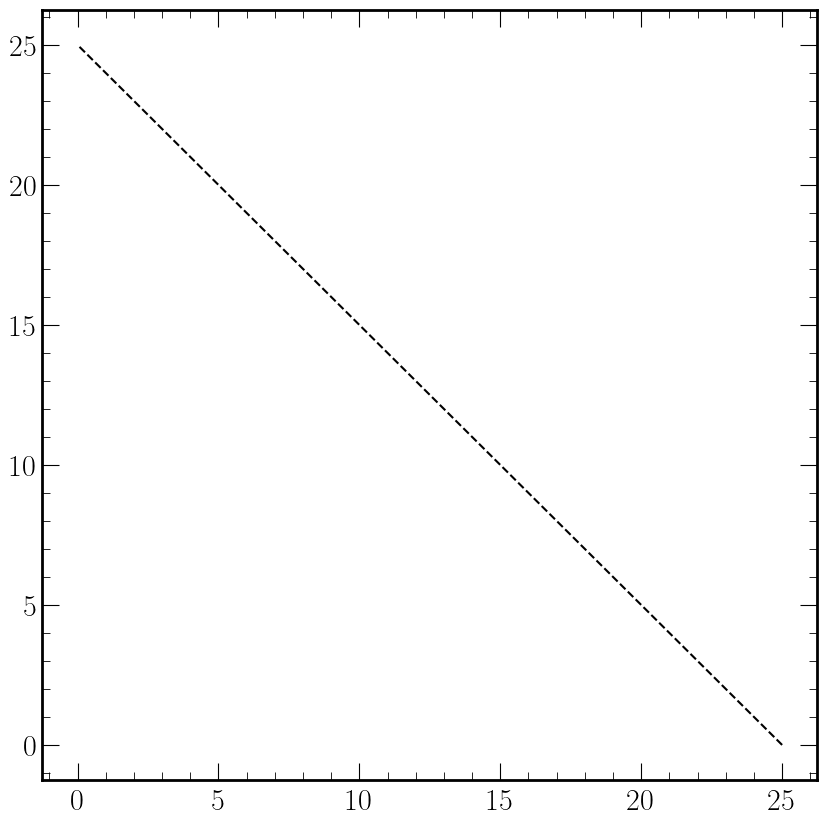

In [37]:
plt.plot([25, 0], [0, 25], color='black', linestyle='--')

In [ ]:
r"x = \begin{cases}"
r"  0, & \text{if } a = 1, \\"
r"  1, & \text{otherwise}."
r"\end{cases}"

In [ ]:
\left{\begin{array}{@{}ll@{}} 0, & \text{if}\ a=1 \\ 1, & \text{otherwise} \end{array}\right.%

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.09326172, 0.14599609, 0.20800781, ..., 1.        , 1.        ,
        1.        ],
       [0.0859375 , 0.10986328, 0.14013672, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05908203, 0.75390625,
        1.        ],
       [0.        , 0.00244141, 0.00244141, ..., 0.04199219, 0.10888672,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.02685547, 0.03955078,
        0.07324219]])

In [106]:
plot_grid_for_contour

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.09326172, 0.14599609, 0.20800781, ..., 1.        , 1.        ,
        1.        ],
       [0.0859375 , 0.10986328, 0.14013672, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.05908203, 0.75390625,
        1.        ],
       [1.        , 0.00244141, 0.00244141, ..., 0.04199219, 0.10888672,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.02685547, 0.03955078,
        0.07324219]])

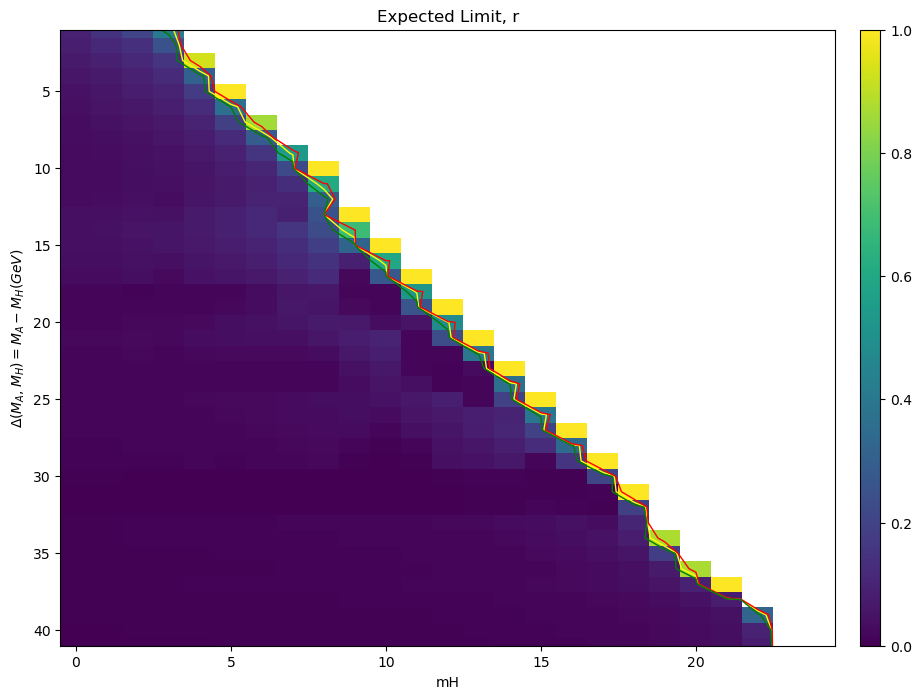

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(plot_grid == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')


# Show all ticks and label them with the respective list entries
sep = 5
# Locations of the yticks
# yticks_loc = np.arange(1, 45, 5)
# yticks_names = np.arange(100, 10, -10) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
# ax.set_yticks(yticks_loc, labels=yticks_names)
# xticks_loc = np.arange(0, 31, 5)
# xticks_names = np.arange(70, 140, 10)
# ax.set_xticks(xticks_loc, labels=xticks_names)

plt.ylim(41, 1)


plt.contour(plot_grid_for_contour, np.array([0.5]) , colors=['yellow'], linewidths=[1])
plt.contour(plot_grid_for_down_contour, np.array([0.5]) , colors=['red'], linewidths=[1])
plt.contour(plot_grid_for_up_contour, np.array([0.5]) , colors=['green'], linewidths=[1])



im.set_clim(0, 1)

plt.xlabel("mH")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H (GeV)$")   

plt.title("Expected Limit, r")
cax = fig.add_axes([ax.get_position().x1+0.025,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)

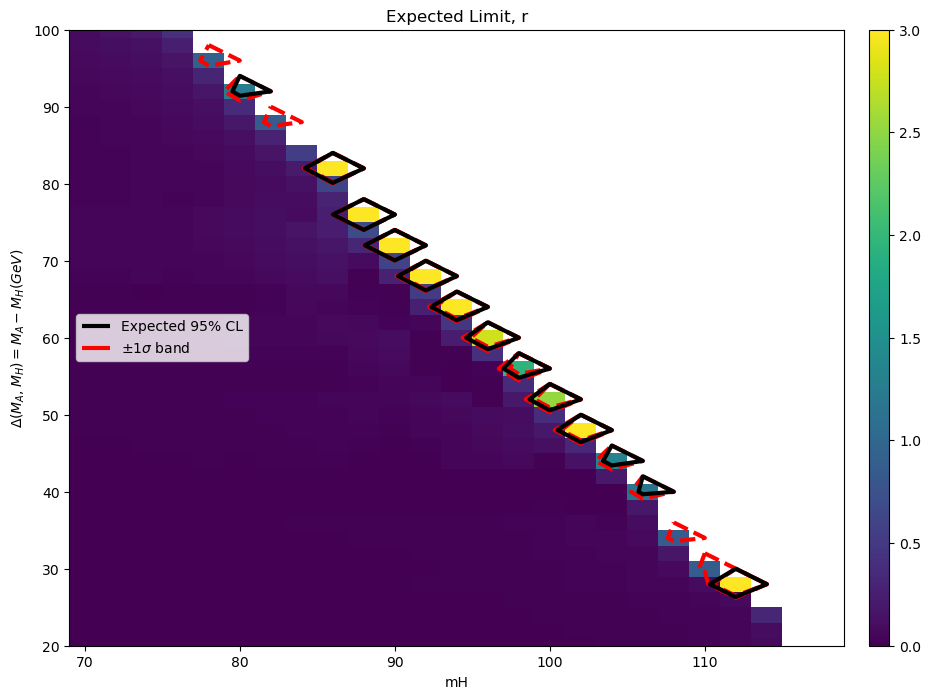

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(plot_grid == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')


# Show all ticks and label them with the respective list entries
sep = 5
# Locations of the yticks
yticks_loc = np.arange(1, 45, 5)
yticks_names = np.arange(100, 10, -10) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
ax.set_yticks(yticks_loc, labels=yticks_names)
xticks_loc = np.arange(0, 31, 5)
xticks_names = np.arange(70, 140, 10)
ax.set_xticks(xticks_loc, labels=xticks_names)

plt.ylim(41, 1)


#plt.contour(plot_grid, np.array([1]) , colors=['yellow'], linewidths=[5])


con_up = plt.contour(plot_grid_for_up_contour, np.array([1]), colors=['red'], 
                     linewidths=[3], linestyles=['--'])
handles_unfilled_up, labels_up = con_up.legend_elements()

con_down = plt.contour(plot_grid_for_down_contour, np.array([1]), colors=['red'], 
                     linewidths=[3], linestyles=['--'])
handles_unfilled_down, labels_down = con_down.legend_elements()

con = plt.contour(plot_grid_for_contour, np.array([1]), colors=['black'], linewidths=[3])
handles_unfilled, labels = con.legend_elements()

ax.legend(handles_unfilled + handles_unfilled_up,
          ["Expected 95% CL", r"$\pm 1 \sigma$ band", r"Expected 95% CL - $\sigma$"], loc='center left')


im.set_clim(0, 3)

plt.xlabel("mH")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H (GeV)$")   

plt.title("Expected Limit, r")
cax = fig.add_axes([ax.get_position().x1+0.025,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)